# 4. 1D Distributions

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
data = np.loadtxt('data/dataset.txt')

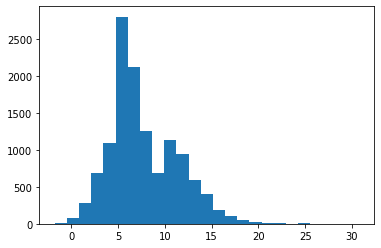

In [3]:
plt.hist(data, bins=25);

# Centrality

### Mean Manual

In [4]:
def get_mean(xs):
    summed = 0
    for x in xs:
        summed += x
    return summed / len(xs)

In [5]:
print(get_mean([3,5,2,6]))

4.0


### Mean Numpy
Three ways to do it

In [6]:
mean = np.mean(data)
print(mean, data.mean(), np.average(data))

7.68805056 7.68805056 7.68805056


### Manual Median

In [7]:
def get_median(xs):
    mid = len(xs) // 2 # Integer division
    if len(xs) % 2 == 1: # Odd
        return sorted(xs)[mid]
    else:
        return 0.5 * np.sum(sorted(xs)[mid - 1:mid + 1])        

In [8]:
print(get_median([7,7,3,1,4,5]))

4.5


In [9]:
print(get_median([7,7,3,1,4,5, 13]))

5


### Median

In [10]:
median = np.median(data)

In [11]:
print(median)

6.7325


### Mode Manual

In [12]:
def get_mode(xs):
    values, counts = np.unique(xs, return_counts=True)
    max_count_index = np.argmax(counts)
    return values[max_count_index]

In [13]:
print(get_mode([1, 7, 2, 5, 3, 3, 8, 3, 2]))

3


### Mode

In [14]:
mode = st.mode(data)

In [15]:
print(mode)

ModeResult(mode=array([5.519]), count=array([9]))


In [16]:
hist, edges = np.histogram(data, bins=100)
edge_centers = 0.5 * (edges[1:] + edges[:-1])
mode_better = edge_centers[hist.argmax()]

In [17]:
print(mode_better)

5.223165


AttributeError: 'Rectangle' object has no property 'histtypye'

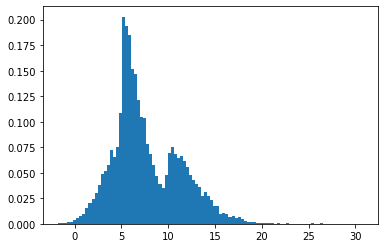

In [18]:
kde = st.gaussian_kde(data)
xvals = np.linspace(data.min(), data.max(), 1000)
yvals = kde(xvals)
mode_even_better = xvals[yvals.argmax()]
plt.hist(data, bins=100, density=True, label='Data Hist', histtypye='step')
plt.plot(xvals, yvals, label='KDE')
plt.axvilne(mode_even_better, label='Mode')
plt.legend();

### Mean is sensitive to outliers - Median and Mode are not

# Variance

### Manual Variance

In [ ]:
def get_var(xs):
    mean = np.mean(xs)
    summed = 0
    for x in xs:
        summed += (x - mean)**2
    return summed / (len(xs) - 1)
#     return summed / (len(xs))

In [ ]:
get_var([1, 2, 3, 4, 5])

### Variance

In [ ]:
var = np.var([[1, 2, 3, 4, 5]])

In [ ]:
print(var)

In [ ]:
var_ddof = np.var([1, 2, 3, 4, 5], ddof=1)

In [ ]:
print(var_ddof)

In [20]:
var_data = np.var(data, ddof=1)

In [21]:
print(var_data)

13.137626632694301


### Std. Dev

In [22]:
std = np.std(data)
print(std, std**2, var_data)

3.6244414221454435 13.136575622563685 13.137626632694301


### Combine and Predict

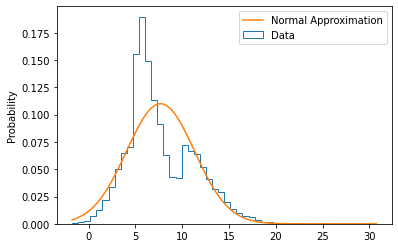

In [23]:
xs = np.linspace(data.min(), data.max(), 100)
ys = st.norm.pdf(xs, loc=mean, scale=std)

plt.hist(data, bins=50, density=True, histtype='step', label='Data')
plt.plot(xs, ys, label='Normal Approximation')
plt.legend()
plt.ylabel('Probability');

## Skewness

- First moment: Zero
- Second moment: Variance
- Third moment: Skewness

A measure of the asymmetry

#### Manual Skewness

In [28]:
def get_skewness(xs):
    mean = np.mean(xs)
    var = np.var(xs)
    summed = 0
    for x in xs:
        summed += (x - mean)**3
    return (summed / (len(xs))) / (var**1.5)

print(get_skewness([1,2,3,4,5]))

0.0


#### From Scipy

In [29]:
skewness = st.skew(data)
print(skewness, get_skewness(data))

0.7408773663373577 0.7408773663373582


Pretty much the same ish

Ok so let's try it on the data with the viz from before

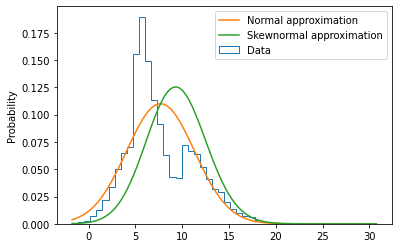

In [30]:
xs = np.linspace(data.min(), data.max(), 100)
ys1 = st.norm.pdf(xs, loc=mean, scale=std)
ys2 = st.skewnorm.pdf(xs, skewness, loc=mean, scale=std)

plt.hist(data, bins=50, density=True, histtype='step', label='Data')
plt.plot(xs, ys1, label='Normal approximation')
plt.plot(xs, ys2, label='Skewnormal approximation')
plt.legend()
plt.ylabel('Probability');

### THIS IS INCORRECT
Because the mean has been introduced into the skewness, it changes the skewness.

The right approach is to estimate how much it changes by and correct for it

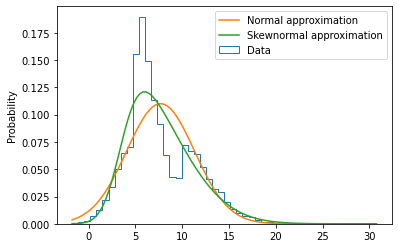

In [31]:
xs = np.linspace(data.min(), data.max(), 100)
ys1 = st.norm.pdf(xs, loc=mean, scale=std)
ps = st.skewnorm.fit(data)
ys2 = st.skewnorm.pdf(xs, *ps)

plt.hist(data, bins=50, density=True, histtype='step', label='Data')
plt.plot(xs, ys1, label='Normal approximation')
plt.plot(xs, ys2, label='Skewnormal approximation')
plt.legend()
plt.ylabel('Probability');

### MUCH BETTER!

## Skewness

- First moment: Zero
- Second moment: Variance
- Third moment: Skewness
- Fourth moment: Kutosis

A measure of the asymmetry

#### Manual Kurtosis

In [33]:
def get_kurtosis(xs):
    mean = np.mean(xs)
    var = np.var(xs)
    summed = 0
    for x in xs:
        summed += (x - mean)**4
    return (summed / (len(xs))) / (var**2)

print(get_skewness([1,2,3,4,5]))

0.0


#### From Scipy

In [34]:
kurtosis = st.kurtosis(data)

In [35]:
print(kurtosis, get_kurtosis(data))

0.5517538497309498 3.551753849730955


#### Not right - need to pass in Fisher
Fisher is a way to normalize the kurtosis so that if run on a normal dist you get 3

Setting Fisher to False subtracts the 3 from the result you get (so 3 - 3 = 0 for a normal dist)

In [38]:
kurtosis = st.kurtosis(data, fisher=False)

In [39]:
print(kurtosis, get_kurtosis(data))

3.5517538497309498 3.551753849730955


#### Looks good now

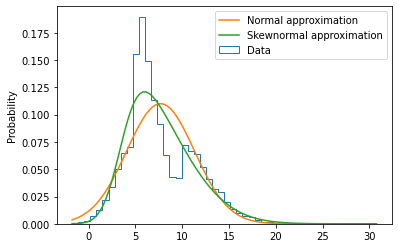

In [31]:
xs = np.linspace(data.min(), data.max(), 100)
ys1 = st.norm.pdf(xs, loc=mean, scale=std)
ps = st.skewnorm.fit(data)
ys2 = st.skewnorm.pdf(xs, *ps)


plt.hist(data, bins=50, density=True, histtype='step', label='Data')
plt.plot(xs, ys1, label='Normal approximation')
plt.plot(xs, ys2, label='Skewnormal approximation')
plt.legend()
plt.ylabel('Probability');

#### Scipy does not have a built in Kurtosis dist function

# Percentiles

In [58]:
ps = np.linspace(0, 100, 10)
ys = np.linspace(0, 100, len(data))

In [59]:
x_p = np.percentile(data, ps)

In [60]:
xs = np.sort(data)

Text(0, 0.5, 'Percentile')

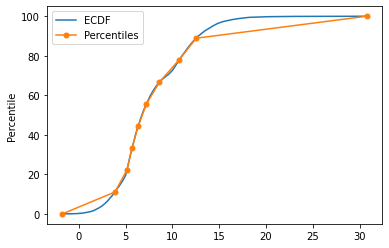

In [61]:
plt.plot(xs, ys, label='ECDF')
plt.plot(x_p, ps, label='Percentiles', marker='.', ms=10)
plt.legend()
plt.ylabel('Percentile')

Not great on the tails - so don't want to really have a linear percentile spacing, but **one that is informed by the probability**

In [62]:
ps = 100 * st.norm.cdf(np.linspace(-3, 3, 30))
ps = np.insert(ps, 0, 0) # Add a point out to tail at data start
ps = np.insert(ps, -1, 100) # Add a point out to tail at data end
ys = np.linspace(0, 100, len(data))

In [63]:
x_p = np.percentile(data, ps)

In [64]:
xs = np.sort(data)

Text(0, 0.5, 'Percentile')

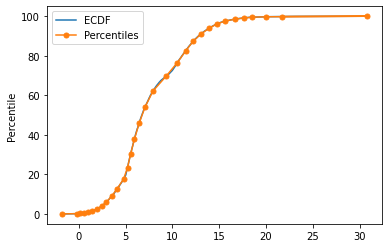

In [65]:
plt.plot(xs, ys, label='ECDF')
plt.plot(x_p, ps, label='Percentiles', marker='.', ms=10)
plt.legend()
plt.ylabel('Percentile')

The power of percentiles is that it reduce a huge dataset into a much smaller data vector

Like take a multiple thousand / million data point set, and reduce it to a linspace vector of 50 or 100 points

But... for 1D data only